# Track and summarize experimental data from 20231010

In [1]:
import os
import glob
import numpy as np
import traceback
import dclab
import dctrack

# supress warning from skimage
import warnings
warnings.filterwarnings( 
    "ignore", message="divide by zero encountered in scalar divide")
warnings.filterwarnings(
    "ignore", message="invalid value encountered in scalar divide")
warnings.filterwarnings(
    "ignore", message="Polyfit may be poorly conditioned")
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="The fit may be poorly conditioned")

C:\Users\freiche\ownCloud\PhD\Code_general\rtdc_tracking2.0\dctrack\track.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [18]:
project_folder = r"..\..\raw_data\20231010_Felix_HL60_LatB_Noco_hyper"
export_folder = r"..\..\tracked_data"

In [19]:
os.listdir(project_folder)

['1um_Noco', '250nM_LatB', '250nM_LatB_1uM_Noco', 'DMSO']

In [ ]:
# length of hyperbolic region in um
length_hyper_region = 500
frame_max = None
timeout = None  # 1h 30m

for root, _, _ in os.walk(project_folder):
    if not "tracked_files" in root:
        rtdc_paths = glob.glob(os.path.join(root,"*.rtdc"))
        for file in rtdc_paths:
            print("Analyzing {} \n".format(file))
            # create directory with same structure as Data/RTDC to export data
            file_split = file.split("\\")
            rtdc_idx = file_split.index("RTDC")
            subfolders_export = np.array(file_split)[rtdc_idx+1:-1]
            save_folder = os.path.join(export_folder,"\\".join(subfolders_export))
            if not os.path.isdir(save_folder):
                os.makedirs(save_folder)
            video_folder = os.path.join(save_folder,"Videos")
            if not os.path.isdir(video_folder):
                os.makedirs(video_folder)

            save_path = os.path.join(save_folder, file_split[-1])
            if not os.path.isfile(save_path):
                try:
                    ds = dclab.new_dataset(file)
                    tr_ds = dctrack.track.TrackedDataSet(ds)

                    pix_size = tr_ds.pixel_size
                    tr_ds.tolerance_window = 30

                    tr_ds.channel = True
                    tr_ds.outlet = False
                    if "inlet" in file:
                        tr_ds.inlet = False
                        channel_entry = tr_ds.channel_x_min - 500/pix_size
                        tr_ds.set_channel_values_manual(x_min=0,
                                                        x_max=tr_ds.roi_size_x)
                    else:
                        tr_ds.inlet = True
                        # ROI start 50 um before channel start
                        channel_entry = tr_ds.channel_x_min + 50/pix_size
                        tr_ds.set_channel_values_manual(x_min=0,
                                                        x_max=channel_entry)
                    # start of hyperbolic region in um
                    hyper_start = channel_entry*pix_size + length_hyper_region

                    tr_ds.track(frame_min=0, frame_max=frame_max,
                                timeout=timeout,
                                max_skip_frames=8)
                    tr_ds.time_after_x(hyper_start, return_value=False,
                                       add_to_dataset=True,
                                       variable_name='time_hyper_region')
                    tr_ds.get_ellipse_data(show_progress=False)

                    frame_tracked = tr_ds.dataset['frame'][:][~np.isnan(tr_ds.dataset['object_number'][:])]
                    tr_ds.filter_feature('frame', 0, frame_tracked[-1])

                    export_features = tr_ds.dataset.features_scalar
                    if 'inert_ratio_raw' not in export_features:
                        export_features += ['inert_ratio_raw', 'inert_ratio_cvx']
                    tr_ds.export_tracked_dataset_as_hdf5(path=save_path,
                                                         features=export_features,
                                                         filtered=True,
                                                         override=True,
                                                         compression=None,
                                                         skip_checks=True)

                    video_path = os.path.join(video_folder, os.path.splitext(file_split[-1])[0]+".avi")
                    tr_ds.write_video(save_path=video_path, first_frame=1000, last_frame=3000,
                                      draw_zones=True)
                except:
                    print("An error occured. See below \n")
                    print(traceback.print_exc())

Analyzing Y:\Data\RTDC\20231010_Felix_HL60_LatB_Noco_hyper\1um_Noco\hyper\M001_data.rtdc 


Tracking in progress:   0%|          | 0/23670 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/1374 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231010_Felix_HL60_LatB_Noco_hyper\1um_Noco\hyper\M002_data.rtdc 


Tracking in progress:   0%|          | 0/50039 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/2575 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231010_Felix_HL60_LatB_Noco_hyper\1um_Noco\hyper\M003_data.rtdc 


Tracking in progress:   0%|          | 0/50335 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/2724 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231010_Felix_HL60_LatB_Noco_hyper\1um_Noco\inlet\M001_data.rtdc 


Tracking in progress:   0%|          | 0/8115 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/727 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231010_Felix_HL60_LatB_Noco_hyper\250nM_LatB\hyper\M001_data.rtdc 


Tracking in progress:   0%|          | 0/26596 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/1111 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231010_Felix_HL60_LatB_Noco_hyper\250nM_LatB\hyper\M002_data.rtdc 


Tracking in progress:   0%|          | 0/49757 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/2018 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231010_Felix_HL60_LatB_Noco_hyper\250nM_LatB\hyper\M003_data.rtdc 


Tracking in progress:   0%|          | 0/49539 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/2469 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231010_Felix_HL60_LatB_Noco_hyper\250nM_LatB\inlet\M001_data.rtdc 


Tracking in progress:   0%|          | 0/9428 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/632 [00:00<?, ?it/s]

## Summarize results

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')
from tqdm.notebook import tqdm
from scripts.stress_hyper import (shear_stress_hyper_wc60_lc500_ell_20230816,
                                  normal_stress_hyper_wc60_lc500_ell_20230817,
                                  total_stress_hyper_wc60_lc500_ell_20230817,
                                  total_stress_hyper_wc60_lc500_20230801,
                                  shear_stress_hyper_wc60_lc500_20230801,
                                  normal_stress_hyper_wc60_lc500_20230621)
from scripts.extensional_paras import (fit_velocity,
                                       extension_rate_from_velocity_poly,
                                       recalculate_time)

In [6]:
# for some reason need to re-register the ellipse features
ell_features = ['ell_cx', 'ell_cy', 'ell_major', 'ell_minor', 'ell_angle']
for ell_feat in ell_features:
    if not dclab.definitions.feature_exists(ell_feat):
        dclab.register_temporary_feature(feature=ell_feat)

In [7]:
def compute_extensional_paras(tr_ds,
                              hyper_start=None, hyper_end=None,
                              stable_region_start=None,
                              filter=False, **filter_kws):
    """
    :param tr_ds: tracked_dataset instance of dctrack
    :return: df: dataframe with additional analysis parameters
    """
    if filter:
        tr_ds.filter_obj_distance = True
        tr_ds.filter_obj_n_events = True
        tr_ds.filter_backward_movement = True
        tr_ds.filter(inplace=True, return_filtered_ds=False, **filter_kws)

    df = tr_ds.get_extensional_paras_dataframe(hyper_start=hyper_start,
                                               hyper_end=hyper_end,
                                               stable_extension_start=stable_region_start
                                               )
    return df

def get_folder_data(folder):
    # print("Analyzing ", folder)
    files = glob.glob(os.path.join(folder, "*.rtdc"))

    df_folder = pd.DataFrame()

    for file in tqdm(files):
        tr_ds = dctrack.track.TrackedDataSet(file)
        flow_rate = np.round(tr_ds.dataset.config['setup']['flow rate'], 2)
        # hyperbola start 500 um before channel
        hyper_start = tr_ds.channel_x_max * tr_ds.pixel_size + 500
        # stable region 100 µm in the hyperbola
        # (flow right to left -> negative sign)
        stable_region_start = hyper_start - 150

        df = compute_extensional_paras(tr_ds,
                                       hyper_start=hyper_start,
                                       stable_region_start=stable_region_start,
                                       filter=True,
                                       max_back_movement=0,
                                       min_events=5)

        # only use data in linear regime for fitting
        df_filtered = df[(150 < df['x_hyper']) & (df['x_hyper'] < 450)]
        x_fit = np.array(df_filtered['x_hyper']) *1e-6 #  in m
        y_fit = np.array(df_filtered['velocity'])
        idx = np.isfinite(x_fit) & np.isfinite(y_fit)
        p, cov = np.polyfit(x_fit[idx], y_fit[idx], 1, cov=True)
        fit_errs = np.sqrt(np.diag(cov))

        df['extension_rate_sample'] = abs(p[0])
        df['extension_rate_sample_err'] = fit_errs[0]
        df['flow_rate'] = flow_rate

        roi_size_x = tr_ds.dataset.config['imaging']['roi size x']
        pix_size = tr_ds.dataset.config['imaging']['pixel size']
        df['pos_x_center'] = df['pos_x'] - roi_size_x * pix_size / 2

        df_folder = pd.concat([df_folder, df])

    return df_folder

def df_fit_values(df_in, x_feature='x_shift', time_label='time_shift', poly_degree=7, x_0=-60,
                  pixel_size=0.68):
    df_temp = df_in.copy()
    df_out = pd.DataFrame()
    flow_rates = df_temp['flow_rate'].unique()
    pbar = tqdm(flow_rates, desc="Iterating over flow_rates")
    for fr in pbar:
        df = df_temp[df_temp['flow_rate'] == fr].copy()
        df['x_shift'] = df['x_hyper'] - x_0
        x = df[x_feature]
        velocity_poly = fit_velocity(df, x_feature=x_feature, degree=poly_degree)
        df['velocity_fit'] = velocity_poly(x)
        er = extension_rate_from_velocity_poly(x, velocity_poly)
        df['extension_rate_fit'] = er
        df = recalculate_time(df, velocity_poly,
                              x_feature=x_feature,
                              time_label=time_label)
        # repeat time calculation for x_hyper -> time_hyper
        velocity_poly = fit_velocity(df, x_feature='x_hyper', degree=poly_degree)
        df = recalculate_time(df, velocity_poly,
                              x_feature='x_hyper',
                              time_label='time_hyper')
        df_out = pd.concat([df_out, df])

    extension_rate = df_out['extension_rate_fit']
    pos_x = df_out['x_hyper']
    # calculate diameter from ellipse fit
    # ellipse features calculated in pixels
    diameter = 2 * np.sqrt(pixel_size**2 * df_out['ell_major'] * df_out['ell_minor'])
    flow_rate = df_out['flow_rate']

    df_out['stress_ir'] = total_stress_hyper_wc60_lc500_20230801(extension_rate,
                                                                 pos_x,
                                                                 diameter,
                                                                 flow_rate)
    df_out['shear_stress_ir'] = shear_stress_hyper_wc60_lc500_20230801(pos_x,
                                                                       diameter,
                                                                       flow_rate)
    df_out['normal_stress_ir'] = normal_stress_hyper_wc60_lc500_20230621(extension_rate)
    df_out['stress_ell'] = total_stress_hyper_wc60_lc500_ell_20230817(
        extension_rate, pos_x, diameter, flow_rate)
    df_out['shear_stress_ell'] = shear_stress_hyper_wc60_lc500_ell_20230816(
        pos_x, diameter, flow_rate)
    df_out['normal_stress_ell'] \
        = normal_stress_hyper_wc60_lc500_ell_20230817(extension_rate)

    return df_out

In [8]:
project_folder = r"T:\Members\Felix\analysis_data\RTDC\20231010_Felix_HL60_LatB_Noco_hyper"
folder_names = ["DMSO",
                "250nM_LatB",
                "250nM_LatB_1uM_Noco",
                "1uM_Noco"
                ]

In [20]:
data_exports = r"..\data_exports"

In [10]:
data_folder = os.path.join(data_exports, "20231010_HL60_LatB_Noco", "exports_20231010")
if not os.path.isdir(data_folder):
    os.makedirs(data_folder)

##### Create and save one dataframe for all hyper data from 20231010
Need to create individual files for each sample because loop breaks often.

In [11]:
x0 = -50
for folder in tqdm(folder_names):
    print("Analyzing: ", folder)
    save_path = os.path.join(data_folder, folder + "_hyper.tsv")

    if not os.path.isfile(save_path):
        data_dir = os.path.join(project_folder, folder, "hyper")
        df_cc = get_folder_data(data_dir)

        df_cc = df_fit_values(df_cc[df_cc['x_hyper'] < 520].copy(), x_0=x0)
        df_cc['sample'] = folder

        df_cc.to_csv(save_path, sep='\t')

  0%|          | 0/4 [00:00<?, ?it/s]

Analyzing:  DMSO


  0%|          | 0/3 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/3 [00:00<?, ?it/s]

Analyzing:  250nM_LatB


  0%|          | 0/3 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/3 [00:00<?, ?it/s]

Analyzing:  250nM_LatB_1uM_Noco


  0%|          | 0/3 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/3 [00:00<?, ?it/s]

Analyzing:  1uM_Noco


  0%|          | 0/3 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
df_20231010 = pd.DataFrame()
files_20231010 = glob.glob(os.path.join(data_folder, "*hyper.tsv"))
for file in tqdm(files_20231010):
    df_cc = pd.read_csv(os.path.join(data_folder, file), sep='\t', index_col=0)
    df_20231010 = pd.concat([df_20231010, df_cc], ignore_index=True)

  0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
# df_20230914.drop(columns=['Unnamed: 0'], inplace=True)
df_20231010['date'] = '20231010'
df_20231010['wc'] = 60
df_20231010['strain_inert'] = df_20231010['inert_ratio_raw'] - 1
# net tensile strain based on inertia ratio assuming shape is an ellipse
df_20231010['net_strain_inert'] = ((df_20231010['inert_ratio_raw'] - 1) 
                                   / np.sqrt(df_20231010['inert_ratio_raw']))
# ellipse features
df_20231010['net_strain_ell'] = (df_20231010['ell_major'] - df_20231010['ell_minor']) \
                                / np.sqrt(df_20231010['ell_major'] * df_20231010['ell_minor'])
df_20231010['taylor_strain_ell'] = (df_20231010['ell_major'] - df_20231010['ell_minor']) \
                                   / (df_20231010['ell_major'] + df_20231010['ell_minor'])

In [14]:
filename = "20231010_hl60_latb_noco_hyper.tsv"
df_20231010.to_csv(os.path.join(data_exports, "20231010_HL60_LatB_Noco", filename),
                   sep='\t')
print("Done")

Done


In [16]:
g = sns.lmplot(data=df_20231010,
               x='x_hyper', y='net_strain_ell', hue='sample', palette='Set2',
               col='flow_rate', col_wrap=5,
               x_bins=100, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'sharey': True})
g.refline(x=x0, markersize=0)
plt.show()

In [17]:
df_20231010

area_msd  area_ratio    area_um    aspect  bright_avg  bright_sd  \
0          372.0    1.030914  177.33041  1.090909  126.376236  23.931980   
1          371.5    1.036339  178.02400  1.045454  125.834564  23.991146   
2          370.5    1.025641  175.71200  1.045454  125.320100  24.177164   
3          374.0    1.028075  177.79280  1.090909  125.406400  23.749199   
4          368.5    1.025780  174.78720  1.045454  124.044890  24.656706   
...          ...         ...        ...       ...         ...        ...   
525857     365.5    1.019152  172.24400  1.045454  113.853905  25.485588   
525858     371.0    1.026954  176.17441  1.090909  114.374690  25.898754   
525859     373.0    1.033512  178.25520  1.043478  114.232100  26.082405   
525860     369.0    1.029810  175.71200  1.090909  113.750626  26.250618   
525861     372.0    1.026882  176.63681  1.090909  112.737625  26.757353   

            circ    deform  ell_angle      ell_cx  ...  stress_ell  \
0       0.990088  0.009913   0.063501  980.688754  ...    1.357763   
1       0.982277  0.017723   0.051748  967.282955  ...    0.878424   
2       0.984563  0.015437   0.034588  954.107739  ...    0.598102   
3       0.987946  0.012054   0.088507  940.690243  ...    0.453030   
4       0.984827  0.015173   0.089664  927.337782  ...    0.398294   
...          ...       ...        ...         ...  ...         ...   
525857  0.988645  0.011355   2.799992  621.989572  ...   33.546180   
525858  0.990438  0.009562   2.816958  593.514020  ...   34.524389   
525859  0.989924  0.010076   2.826666  562.822201  ...   34.997410   
525860  0.989546  0.010454   2.804594  529.952305  ...   34.955270   
525861  0.991325  0.008675   2.839557  494.649990  ...   34.802841   

        shear_stress_ell  normal_stress_ell    sample      date  wc  \
0               0.257160           1.100603  1uM_Noco  20231010  60   
1               0.257711           0.620712  1uM_Noco  20231010  60   
2               0.256330           0.341772  1uM_Noco  20231010  60   
3               0.258338           0.194692  1uM_Noco  20231010  60   
4               0.254907           0.143387  1uM_Noco  20231010  60   
...                  ...                ...       ...       ...  ..   
525857          5.345500          28.200680      DMSO  20231010  60   
525858          6.092823          28.431566      DMSO  20231010  60   
525859          6.855944          28.141466      DMSO  20231010  60   
525860          7.550267          27.405003      DMSO  20231010  60   
525861          8.445662          26.357180      DMSO  20231010  60   

        strain_inert  net_strain_inert  net_strain_ell  taylor_strain_ell  
0           0.095473          0.091218        0.091008           0.045457  
1           0.090441          0.086609        0.090289           0.045098  
2           0.091244          0.087346        0.087770           0.043843  
3           0.094335          0.090178        0.091690           0.045797  
4           0.074391          0.071769        0.072961           0.036456  
...              ...               ...             ...                ...  
525857      0.068428          0.066201        0.083993           0.041959  
525858      0.097567          0.093130        0.116196           0.058000  
525859      0.080588          0.077524        0.094893           0.047393  
525860      0.082987          0.079744        0.102499           0.051183  
525861      0.093177          0.089118        0.107809           0.053826  

[525862 rows x 67 columns]

### Summarize inlet data

In [23]:
def get_folder_data_inlet(folder):
    # print("Analyzing ", folder)
    files = glob.glob(os.path.join(folder, "*.rtdc"))

    df_folder = pd.DataFrame()

    for file in tqdm(files):
        tr_ds = dctrack.track.TrackedDataSet(file)
        flow_rate = np.round(tr_ds.dataset.config['setup']['flow rate'], 3)
        # hyperbola start 500 um before channel
        hyper_start = tr_ds.channel_x_min * tr_ds.pixel_size - 500

        df = compute_extensional_paras(tr_ds,
                                       hyper_start=hyper_start,
                                       filter=True,
                                       max_back_movement=0,
                                       min_events=5)
        df['flow_rate'] = flow_rate
        roi_size_x = tr_ds.dataset.config['imaging']['roi size x']
        pix_size = tr_ds.dataset.config['imaging']['pixel size']
        df['pos_x_center'] = df['pos_x'] - roi_size_x * pix_size / 2

        df_folder = pd.concat([df_folder, df])

    return df_folder

In [24]:
for folder in tqdm(folder_names):
    print("Analyzing: ", folder)
    save_path = os.path.join(data_folder, folder + "_inlet.tsv")

    if not os.path.isfile(save_path):
        data_dir = os.path.join(project_folder, folder, "inlet")
        df_cc = get_folder_data_inlet(data_dir)
        df_cc = df_fit_values(df_cc, x_0=x0)
        df_cc['sample'] = folder
        df_cc.to_csv(save_path, sep='\t')

  0%|          | 0/4 [00:00<?, ?it/s]

Analyzing:  DMSO


  0%|          | 0/1 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/1 [00:00<?, ?it/s]

Analyzing:  250nM_LatB


  0%|          | 0/1 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/1 [00:00<?, ?it/s]

Analyzing:  250nM_LatB_1uM_Noco


  0%|          | 0/1 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/1 [00:00<?, ?it/s]

Analyzing:  1uM_Noco


  0%|          | 0/1 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
df_20231010_inlet = pd.DataFrame()
files_20231010_inlet = glob.glob(os.path.join(data_folder, "*inlet.tsv"))
for file in tqdm(files_20231010_inlet):
    df_cc = pd.read_csv(os.path.join(data_folder, file), sep='\t', index_col=0)
    df_20231010_inlet = pd.concat([df_20231010_inlet, df_cc], ignore_index=True)

  0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
# df_20230914_inlet.drop(columns=['Unnamed: 0'], inplace=True)
df_20231010_inlet['date'] = '20231010'
df_20231010_inlet['wc'] = 60
df_20231010_inlet['strain_inert'] = df_20231010_inlet['inert_ratio_raw'] - 1
# net tensile strain based on inertia ratio assuming shape is an ellipse
df_20231010_inlet['net_strain_inert'] = ((df_20231010_inlet['inert_ratio_raw'] - 1)
                                         / np.sqrt(df_20231010_inlet['inert_ratio_raw']))
# ellipse features
df_20231010_inlet['net_strain_ell'] \
    = (df_20231010_inlet['ell_major'] - df_20231010_inlet['ell_minor']) \
      / np.sqrt(df_20231010_inlet['ell_major'] * df_20231010_inlet['ell_minor'])
df_20231010_inlet['taylor_strain_ell'] \
    = (df_20231010_inlet['ell_major'] - df_20231010_inlet['ell_minor']) \
      / (df_20231010_inlet['ell_major'] * df_20231010_inlet['ell_minor'])

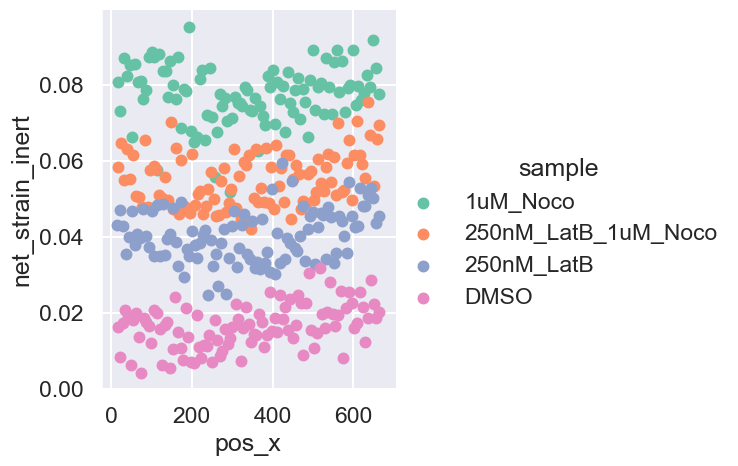

In [30]:
g = sns.lmplot(data=df_20231010_inlet,
               x='pos_x', y='net_strain_inert',
               hue='sample', palette='Set2',
               x_bins=100, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'sharey': True})
# g.refline(x=x0, markersize=0)
plt.show()

In [31]:
filename = "20231010_hl60_latb_noco_inlet.tsv"
df_20231010_inlet.to_csv(os.path.join(data_exports, "20231010_HL60_LatB_Noco", filename),
                         sep='\t')
print("Done")

Done
